# Chapter 1: Non-linear equation solving
MTH 264 Numerical Methods

Kittapat Ratanaphupha

## Bisection Method
Bisection method is an algorithm inspired by binary search to find non-linear equation.

### The algorithm
Bisection method will be done by the following script. Also, the script supports a set of keyword arguments in non-linear function. Although, there is an assumption that the function is continuous; it returns a history of middle points, a history of function in the middle points. If the last point function does not converge to zero, it can imply that the function is suspiciously non-continuous.

In [4]:
import numpy as np
import math

def bisection_method(x_min, x_max, tolerance, function, **kwargs):
    assert [type(float(x_min)), type(float(x_max)), type(float(tolerance))] == [float, float, float], "Initial values are not numeric."
    assert type(float(function(x_min, **kwargs))) == float, "Function cannot return numeric."
    assert min(function(x_min, **kwargs), function(x_max, **kwargs)) <= 0, "No negative in the boundary."
    assert max(function(x_min, **kwargs), function(x_max, **kwargs)) >= 0, "No positive in the boundary."
    
    middle_log = []
    middle_function = []

    middle = (x_min + x_max) / 2
    middle_log.append(middle)

    if (function(x_min, **kwargs) == 0) or (function(x_max, **kwargs) == 0):
        return  [x_min, x_max],\
                [x_min - (x_max if function(x_min, **kwargs) != 0 else x_min), x_max - (x_min if function(x_max, **kwargs) != 0 else x_max)],\
                [function(x_min, **kwargs), function(x_max, **kwargs)]

    while (function(middle, **kwargs) != 0) and ((x_max - x_min) > max(tolerance, 2**-53)):
        sign_x_min = math.copysign(1, x_min)
        if math.copysign(1, function(middle, **kwargs)) == sign_x_min:
            x_max = middle
        else:
            x_min = middle
        middle = (x_min + x_max) / 2
        middle_log.append(middle)
        middle_function.append(function(middle, **kwargs))
    
    middle_error = np.abs(np.array(middle_log) - middle)

    return middle_log, middle_error, middle_function

### Function for testing an algorithm
For this case, a function for testing is $ f(x) = ax^2 + bx + c $ with default condition as $ a = 3, b = 5.5, c = -6 $

In [5]:
def parabola(x, a = 3, b = 5.5, c = -6):
    return a*x**2 + b*x + c

### Search region
In this part, the method is implemented, and the output is going to visualize where the middle point goes in each step.

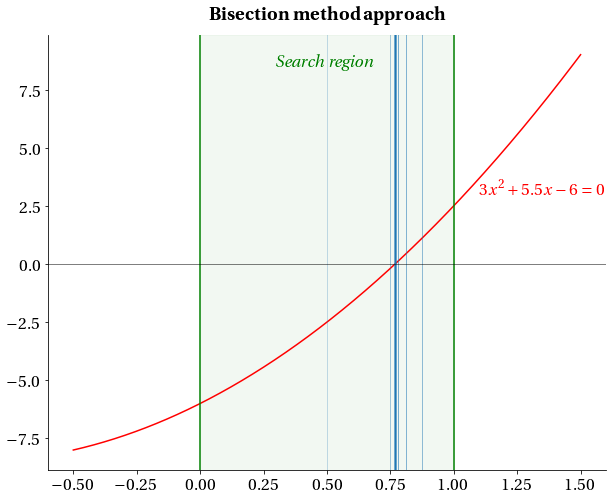

In [7]:
import matplotlib.pyplot as plt
import matplotlib

x, error, fn_middle = bisection_method(0, 1, 5e-12, parabola)

matplotlib.rc('text', usetex=True)
matplotlib.rc('font', size=18)
matplotlib.rc('legend', fontsize=18)
matplotlib.rc('text.latex', preamble=r'\usepackage{fourier}')

fig, ax = plt.subplots(figsize=(10,8))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.plot(np.arange(-0.5,1.5,1e-5), parabola(np.arange(-0.5,1.5,1e-5)), c = "red")
for i in range(len(x)):
    ax.axvline(x[i], alpha = 0.75*(np.log((i+1))/np.log(len(x)))+0.25, linewidth = 1)
ax.axvline(0, c = "green")
ax.axvline(1, c = "green")
ax.axvspan(0, 1, alpha = 0.05, color='green')
ax.text(0.3, 8.5, r"\emph{Search region}", c = "green")
ax.axhline(0, c = "black", linewidth = 0.5)

plt.rcParams["font.family"] = "serif"
plt.text(1.1, 3, r"$3x^2+5.5x-6=0$", c = "red")
plt.title(r"\textbf{Bisection method approach}", fontsize = 20, family = "sans-serif", y = 1.02)
plt.show()

**Figure 1**: the red line is about to calculate a solution of quadratic equation. When the search region is scoped as [0,1], the first middle point is 0.5 that shows in the graph as light blue. Then, in next iterations, the middle regenerates a darker line but in search area shows in the green region.

### Error analysis
The error we measure is about x-values error $ |x_n-x| $ when $x_n$ is an approximator of a solution.

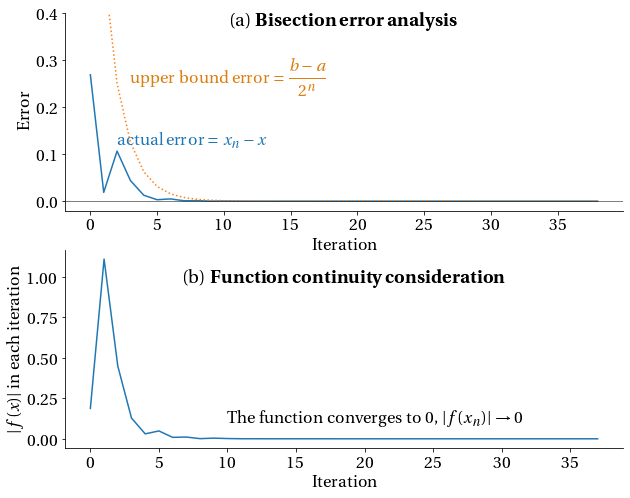

In [12]:
fig, (ax1, ax2) = plt.subplots(figsize=(10,8), nrows = 2)
plt.rcParams["font.family"] = "serif"

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax1.plot(error)
ax1.plot(1/np.power(2*np.ones(len(error)),np.arange(0, len(error), 1)), linestyle = "dotted")
ax1.axhline(0, c = "black", linewidth = 0.5)

ax1.text(2, 0.12,r"actual error $=x_n-x$", c = "#1f77b4")
ax1.text(3, 0.25,r"upper bound error $= \displaystyle\frac{b-a}{2^n}$", c = "#dd7f0e")
ax1.set_ylabel("Error")
ax1.set_xlabel("Iteration")
ax1.set_title(r"(a) \textbf{Bisection error analysis}", fontsize = 20, family = "sans-serif", y = .9)

ax2.plot(np.abs(np.array(fn_middle)))
ax2.set_ylabel(r"$|f(x)|$ in each iteration")
ax2.set_xlabel(r"Iteration")
ax2.set_title(r"(b) \textbf{Function continuity consideration}", fontsize = 20, family = "sans-serif", y = .8)
ax2.text(10, 0.1, r"The function converges to 0, $|f(x_n)|\rightarrow 0$")

ax1.set_ylim([-.02,0.4])
plt.show()

**Figure 2**: (a) bisection error analysis, as orange line is an upper bound error that is $\dfrac{b-a}{2^n}$ and blue line is the actual error rate. (b) Function continuity consideration, as $\delta-\epsilon$ definition of continuous function when $\forall \epsilon > 0, \exists \delta > 0, |f(x_n)-f(x)| < \epsilon, |x_n - x| < \delta$ is that, when the error converges to 0, a function error converges to 0 too. In this function, it can be summarized that the function is continuous due to convergence of solution.

### Time complexity
For algorithm analysis, a time complexity analysis is the promenient one. First, the script will run iteratively at tolerance $1$ to $2^{-53}$ as maximum precision of double datatype.

In [ ]:
time_complex = []
for i in range(101):
    func_time = %timeit -o bisection_method(0, 1, 2**(-53/100*i), parabola)
    time_complex.append(func_time)
time_complex

Then, append a value of $\mu, \mu+\sigma, \mu-\sigma$ (average and range of 1 standard deviation)

In [15]:
y_u = []
y_m = []
y_l = []

fig = plt.figure(figsize = (10,8))
for i in time_complex:
    y_u.append(i.average * 1000000 + i.stdev * 1000000)
    y_m.append(i.average * 1000000)
    y_l.append(i.average * 1000000 - i.stdev * 1000000)

<Figure size 720x576 with 0 Axes>

Also, OLS is implemented with acquired data $\mu(\delta)$ from the previous steps.

In [16]:
import statsmodels.api as sm
X = sm.add_constant(np.arange(0, 53, 53/101))
models = sm.OLS(y_m, X)
results = models.fit()
results.params

array([12.00779438,  2.24145116])

The results suggest that a set of coefficients rejects null hypothesis $H_0: \beta_i = 0$ according to t-test (p < 0.01). Also, since the Jarque-Bara test suggests as high probability of normality (p > 0.05), the hypothesis cannot reject the null that $H_0: X \sim N(0,\sigma^2)$.

In [17]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     5753.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):           1.62e-89
Time:                        01:20:59   Log-Likelihood:                -295.19
No. Observations:                 101   AIC:                             594.4
Df Residuals:                      99   BIC:                             599.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0078      0.898     13.378      0.0

Finally, here is a visualization of time complexity analysis.

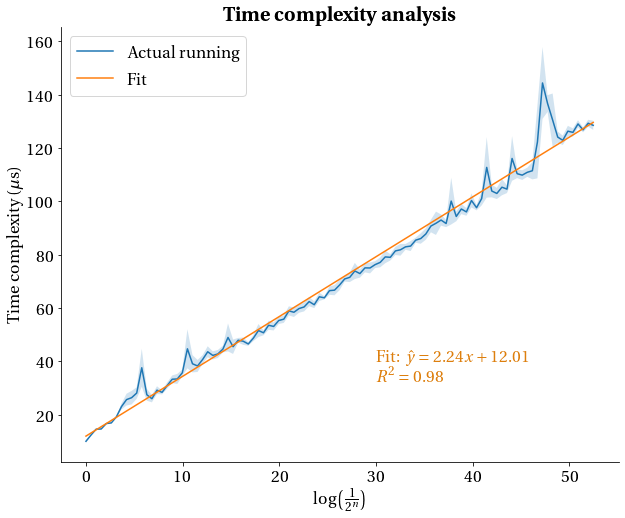

In [18]:
fig, ax = plt.subplots(figsize = (10,8))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.plot(np.arange(0, 53, 53/101), y_m, label = "Actual running")
plt.plot(np.arange(0, 53, 53/101), results.params[0] + results.params[1] * np.arange(0, 53, 53/101), label = "Fit")
plt.fill_between(np.arange(0, 53, 53/101), y_u, y_l, alpha = 0.2)
plt.xlabel(r"$\log\left(\frac{1}{2^n}\right)$")
plt.ylabel(r"Time complexity ($\mu$s)")
plt.title(r"\textbf{Time complexity analysis}")
plt.text(30, 40, r"\noindent Fit: ${\hat y}=%.2f x+%.2f\\R^2 = %.2f$" % (results.params[1], results.params[0], results.rsquared), c = "#dd7f0e")
plt.legend()
plt.show()

**Figure 3**: time complexity analysis shows in two lines, blue line with a lighter shade for 1 standard deviation range and orange line. A blue line represents the actual time usage subject to tolerances. The orange line is a result from regression using OLS. It suggests that a trend line of time complexity is in the form of logarithm of numbers of subsection in search region, $\log(\frac{1}{2^n})$.

## Quasi-Newton Method (Secant method)
Secant method is a method based on Newton's method, but in sense of derivative approximation. Newton's method iterates with a tangent line equation, but this iterates with a secant line.

### The algorithm
Secant method can be done by implementing as a below script. The iteration is interested on finding an intersection between the secant line and the $x$-axis like the equation below,
$$ x_n = x_{n-1} + \frac{x_{n-1} - x_{n-2}}{f(x_{n-1}) - f(x_{n-2})}f(x_{n-1}). $$

In [3]:
def secant_method(x_0, x_1, iteration, function, **kwargs):
    assert [type(float(x_0)), type(float(x_1)), type(iteration)] == [float, float, int], "Initial values are not numeric."
    assert type(float(function(x_0, **kwargs))) == float, "Function cannot return numeric."
    assert function(x_0, **kwargs) - function(x_1, **kwargs) != 0, "Divided by 0, cannot find a solution"
    
    x_n = [x_0, x_1]
    f_x = [function(x_0, **kwargs), function(x_1, **kwargs)]
    d_x = []
    x_2 = float()
    i = 0

    if (function(x_0, **kwargs) == 0) or (function(x_1, **kwargs) == 0):
        return  [x_0, x_1], [function(x_0, **kwargs), function(x_0, **kwargs)], None
    
    while (i < iteration) and ((x_1 - x_0) != 0):
        x_2 = x_1 - function(x_1, **kwargs) * (x_1 - x_0)/(function(x_1, **kwargs) - function(x_0, **kwargs))
        x_n.append(x_2)
        f_x.append(function(x_2, **kwargs))
        d_x.append((function(x_1, **kwargs) - function(x_0, **kwargs))/(x_1 - x_0))

        x_0 = x_1
        x_1 = x_2
        
        i += 1

    return x_n, f_x, d_x

### Search region
In this part, the method is implemented, and the output is going to visualize the secant line in each step until the solution emerges.

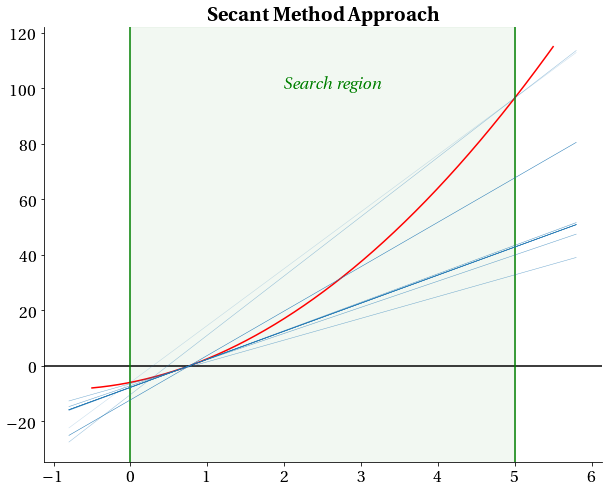

In [69]:
x_n, f_x, d_x = secant_method(0, 5, 10000, parabola)

fig, ax = plt.subplots(figsize=(10,8))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.plot(np.arange(-0.5,5.5,1e-5), parabola(np.arange(-0.5,5.5,1e-5)), c = "red")
xmin, xmax = ax.get_xlim()
ax.axhline(0, c = "black")
X = np.arange(xmin, xmax, 1e-5)

ax.axvline(0, c = "green")
ax.axvline(5, c = "green")
ax.axvspan(0, 5, alpha = 0.05, color='green')

ax.text(2, 100, r"\emph{Search region}", c = "green")

for i in range(len(d_x)):
    ax.plot(X, d_x[i] * X + (f_x[i] * x_n[i+1] - f_x[i+1] * x_n[i]) / (x_n[i+1] - x_n[i]), alpha = 0.75*(np.log((i+1))/np.log(len(d_x)))+0.25, linewidth = 0.5, c = "#1f77b4")

plt.title(r"\textbf{Secant Method Approach}")
plt.show()

**Figure 4**: the search region in secant method is wider than the region used for bisection method. Although, the sequence is converge faster than the bisection in the same precision.

### Time complexity analysis
In the case of parabola, time complexity is independent of gap widerness.

In [ ]:
time_complex_2 = []
for i in range(100):
    func_time = %timeit -o secant_method(0, i+.1, 10000, parabola)
    time_complex_2.append(func_time)
time_complex_2

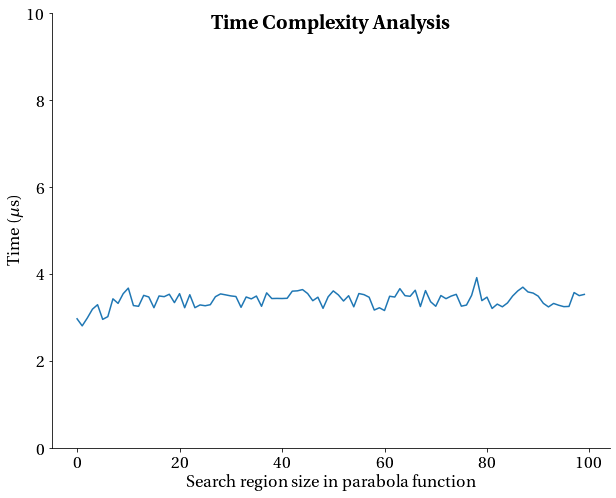

In [16]:
fig, ax = plt.subplots(figsize = (10,8))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.plot([i.average * 100000 for i in time_complex_2[:100]])
plt.title(r"\textbf{Time Complexity Analysis}", y = .95)
plt.ylabel(r"Time ($\mu$s)")
plt.xlabel(r"Search region size in parabola function")
ax.set_ylim([0,10])
plt.show()

**Figure 5**: time complexity in the secant method is constant in parabola function.

### Error analysis
According to the analysis of error, we can figure out that the speed of convergence is 1.618. ($e_{n+1} \propto e_n^\varphi \sim e_n^{1.618}$)

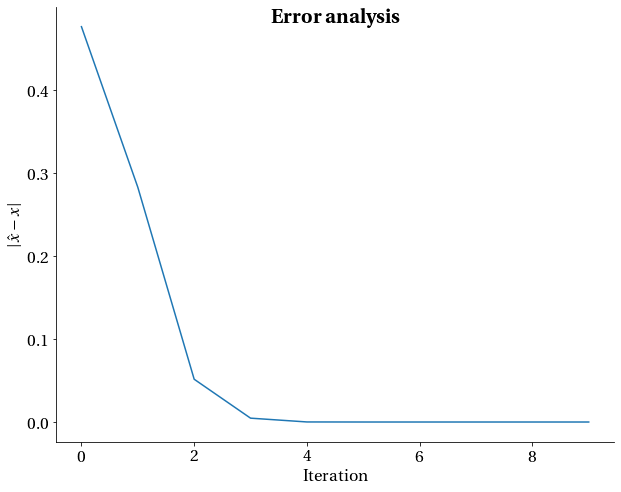

In [76]:
fig, ax = plt.subplots(figsize = (10,8))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

e_n = np.abs(np.array(x_n[2:]) - x_n[-1])
plt.plot(e_n)
plt.xlabel("Iteration")
plt.ylabel(r"$|{\hat x} - x|$")
plt.title(r"\textbf{Error analysis}", y = .95)
plt.show()

**Figure 6**: we see that the error in secant method is converging and meets zero in a few iterations.

## Fixed-Point Iteration
This method is based on fixed point problem, $f(x) = x$. What we would like to solve is the solution of fixed point problem by iteration.

### The Algorithm
First, we will set an initial value for solving a recursion relation like this,
$$x_n = f(x_{n-1}).$$
For the given conditions, the algorithm can be implemented like the below script:

In [2]:
def fixed_point(x_0, tolerance, runs, function, **kwargs):
    assert type(float(function(x_0, **kwargs))) == float, "This function is not numeric."
    x_n = [x_0]
    i = 0
    while (np.abs(x_0 - function(x_0, **kwargs)) > tolerance) and (i < runs):
        x_0 = function(x_0, **kwargs)
        x_n.append(x_0)
        i += 1
    return x_n

### Function convergence
For the case that we know, the function can give a convergence in the case of Lipschitz continuous with $L < 1$.

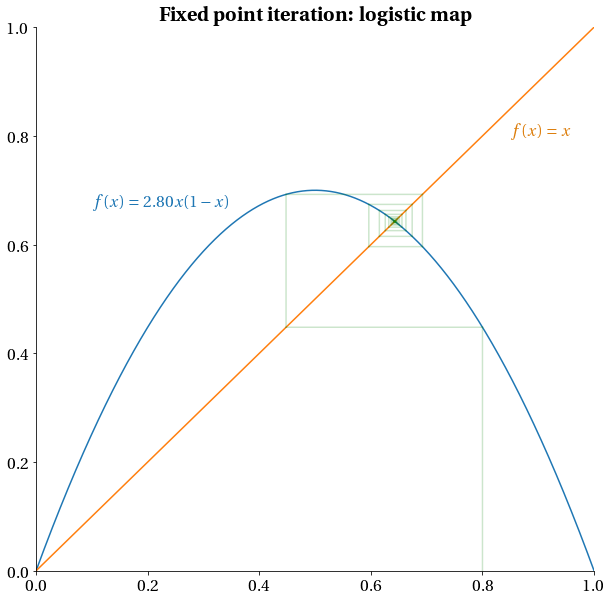

In [94]:
r = 2.8
initial_alpha = 0.2

x_n = fixed_point(0.8, 5e-12, 100, parabola, a = -r, b = r, c = 0)
X = np.arange(-.5, 1.5, 1e-5)

fig, ax = plt.subplots(figsize = (10,10))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.plot(X, parabola(X, a = -r, b = r, c = 0))
plt.plot(X, X)

Y_tmp = np.arange(min(0, parabola(x_n[0], a = -r, b = r, c = 0)), max(0, parabola(x_n[0], a = -r, b = r, c = 0)), 1e-5)
plt.plot(np.ones(len(Y_tmp))*x_n[0], Y_tmp, alpha = initial_alpha, c = "green")
for i in range(len(x_n)-1):
    X_tmp = np.arange(min(x_n[i], x_n[i+1]), max(x_n[i],x_n[i+1]), 1e-5)
    plt.plot(X_tmp, x_n[i+1] * np.ones(len(X_tmp)), alpha = initial_alpha + np.exp(2*i+1)/np.exp(2*len(x_n)+2) * (1 - initial_alpha) , c = "green")
    Y_tmp = np.arange(min(x_n[i+1], parabola(x_n[i+1], a = -r, b = r, c = 0)), max(x_n[i+1], parabola(x_n[i+1], a = -r, b = r, c = 0)), 1e-5)
    plt.plot(np.ones(len(Y_tmp))*x_n[i+1], Y_tmp, alpha = initial_alpha + np.exp(2*i+2)/np.exp(2*len(x_n)+2) * (1 - initial_alpha) , c = "green")

ax.set_ylim(0, 1)
ax.set_xlim(0, 1)

plt.title(r"\textbf{Fixed point iteration: logistic map}")
plt.text(0.85, 0.8, r"$f(x) = x$", c = "#dd7f0e")
plt.text(0.1, 1.1 * parabola(0.32, a = -r, b = r, c = 0), r"$f(x) = %.2f x(1-x)$" % (r), c = "#1f77b4")

plt.show()

**Figure 7**: the graph shows the convergence of fixed point iteration as green path. The path will converge at the intersection point, satisfies the equation $f(x) = x$.

### Error analysis

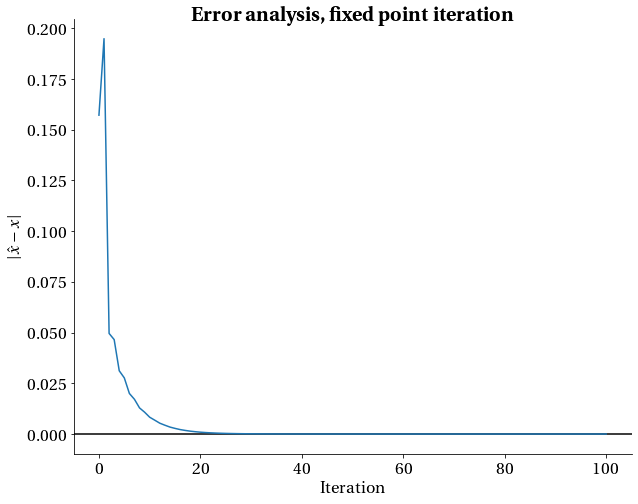

In [95]:
fig, ax = plt.subplots(figsize = (10,8))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.axhline(0, c = "black")
plt.plot(np.abs(np.array(x_n) - (r-1)/r))
plt.title(r"\textbf{Error analysis, fixed point iteration}", y = 0.98)

plt.xlabel(r"Iteration")
plt.ylabel(r"$|{\hat x}-x|$")

plt.show()

**Figure 8**: the rate of convergence is fast but arbitrary with function. In this case, the value converges about 30 iterations.